In [157]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# print(city_df.head(),'\n',ride_df.head())
# Combine the data into a single dataset
merge_df = pd.merge(city_df,ride_df,on="city",how="inner")
# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

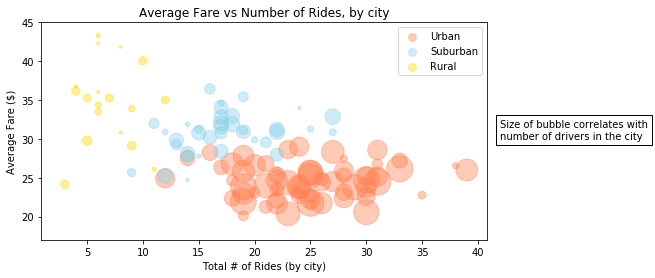

In [164]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
merge_groupby_city = merge_df.groupby(['city'])
num_rides_by_city = merge_groupby_city['driver_count'].count()
avg_fare_by_city = merge_groupby_city['fare'].mean()
ride_share_df = pd.DataFrame()
ride_share_df['number_rides'] = num_rides_by_city
ride_share_df['avg_fare'] = avg_fare_by_city


ride_share_df = ride_share_df.merge(city_df,on='city', how="inner")

#print(ride_share_df.head())

colors = ['coral','skyblue','gold']
i = 0
plt.figure(figsize=(8,4))
for citytype in ['Urban','Suburban','Rural']:
    plt.scatter(ride_share_df.loc[ride_share_df['type'] == citytype]['number_rides'],
                ride_share_df.loc[ride_share_df['type'] == citytype]['avg_fare'],
                c=colors[i],
                s=ride_share_df.loc[ride_share_df['type'] == citytype]['driver_count']*10,
                alpha=0.4,
                label=citytype,
                )
    i += 1
#i don't like edge on these bubbles
    
    
# Incorporate the other graph properties

# Create a legend
legend = plt.legend(loc="best")
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

# Incorporate a text label regarding circle size

plt.xlabel("Total # of Rides (by city)")
plt.ylabel("Average Fare ($)")
plt.ylim((17,45))
plt.title("Average Fare vs Number of Rides, by city")
# Save Figure
plt.text(42,30, "Size of bubble correlates with\nnumber of drivers in the city",bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig("Fare vs Num Rides.png",bbox_inches="tight")
plt.show()

In [118]:
# Show plot
plt.show()

## Total Fares by City Type

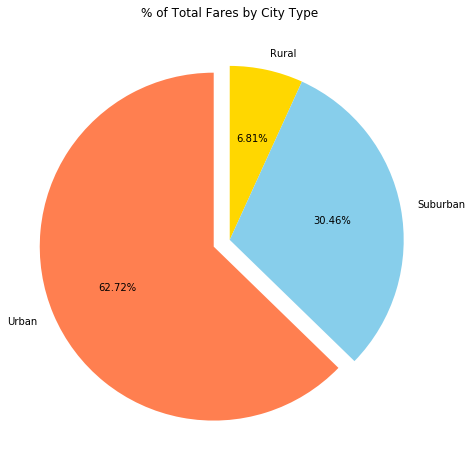

In [171]:
# Calculate Type Percents
merge_groupby_type = merge_df.groupby(['type'])
total_fare_by_city_type = merge_groupby_type['fare'].sum()
# print(total_fare_by_city_type)

plt.figure(figsize=(8,8))
plt.pie(total_fare_by_city_type, explode=[0,0,.1], colors=["gold","skyblue","coral"],
        labels=total_fare_by_city_type.index,autopct='%.2f%%',counterclock=False,startangle=90)#,shadow=True)
#shadow feels like unnecessary noise.
plt.title("% of Total Fares by City Type")

# Build Pie Chart

# Save Figure

plt.savefig('Total Fare vs City Type.png')
plt.show()


In [120]:
# Show Figure
plt.show()

## Total Rides by City Type

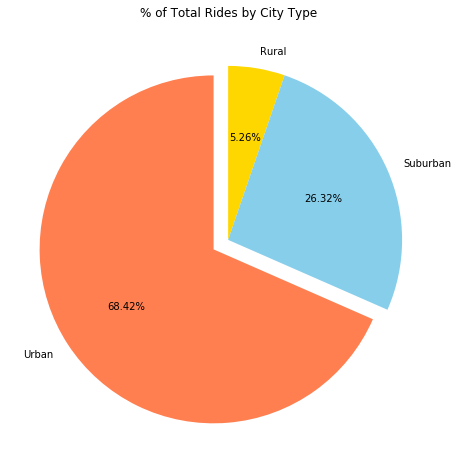

In [168]:
# Calculate Ride Percents
total_rides_by_city_type = merge_groupby_type['fare'].count()
# print(total_rides_by_city_type)

plt.figure(figsize=(8,8))
plt.pie(total_rides_by_city_type, explode=[0,0,.1], colors=["gold","skyblue","coral"],
        labels=total_rides_by_city_type.index,autopct='%.2f%%',counterclock=False,startangle=90)
plt.title("% of Total Rides by City Type")

# Build Pie Chart

# Save Figure

plt.savefig('Total Rides vs City Type.png')
plt.show()


In [122]:
# Show Figure
plt.show()

## Total Drivers by City Type

          driver_count
type                  
Rural               78
Suburban           490
Urban             2405


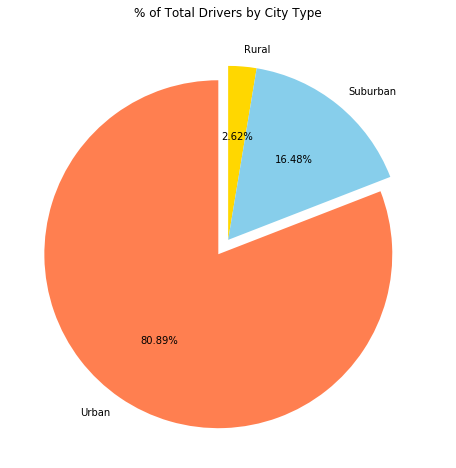

In [169]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

#no point using the merged dataframe when the city dataset has all the data I need...
city_group = city_df.groupby('type')
driverbycity = city_group.sum()
print(driverbycity)


plt.figure(figsize=(8,8))
plt.pie(driverbycity, explode=[0,0,.1], colors=["gold","skyblue","coral"],
        labels=driverbycity.index,autopct='%.2f%%',counterclock=False,startangle=90)
plt.title("% of Total Drivers by City Type")

# Build Pie Chart

# Save Figure

plt.savefig('Total Drivers vs City Type.png')
plt.show()


In [124]:
# Show Figure
plt.show()